**2.3.1. Загрузка данных и первичный осмотр**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
dataset = pd.read_csv('dataset.csv')
df = pd.DataFrame(dataset)  #Загурзка учебного датасета

In [9]:
df.head(10) #Выыод первых 10 строк файла

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [11]:
df.info() #информация о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [12]:
df.describe() #базовые описательные статистики 

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [13]:
df.count() #количество non-null значений 

user_id      41
age          39
country      41
purchases    41
revenue      41
dtype: int64

In [14]:
df.nunique() # количество уникальных значений

user_id      40
age          28
country       5
purchases    12
revenue      37
dtype: int64

**2.3.2. Пропуски, дубликаты и базовый контроль качества**

In [15]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [16]:
df.duplicated() #доля пропусков в каждом слобце

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [35]:
# Id повторятся
duplicates = df[df.duplicated(subset=['user_id'], keep=False)]['user_id']
print(duplicates_in_a)

9     10
40    10
Name: user_id, dtype: int64


In [56]:
# выводим сторки в которых значаение в столбце age < 18
values = df[df['age'] < 18]
print(values)

    user_id  age country  purchases  revenue
20       21  5.0      RU          8     1488


In [48]:
values = df[df['purchases'] < 0]
print(values)

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [52]:
#выводим пустые ячеки в столбце age
print(df[df['age'].isna()])

    user_id  age country  purchases  revenue
4         5  NaN      DE          6     1296
12       13  NaN      US          9      630


In [55]:
values = df[df['age'] > 100]
print(values)

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [75]:
rows = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
print(rows)

    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


- Id номер должен быть уникальный 
- Слишком большой доход для небольшого возраста
- Отрцательное количество покупок
- Пустые ячейки в колонке возраст хотя есть покупки
- Сомнительно большой возраст
- Есть покупки, но нет дохода

**2.3.3. Базовый EDA: группировки, агрегаты и частоты**

In [82]:
counts = df['age'].value_counts()
print(counts)

age
24.0     5
52.0     2
31.0     2
39.0     2
28.0     2
35.0     2
47.0     2
32.0     2
20.0     1
25.0     1
46.0     1
120.0    1
22.0     1
57.0     1
36.0     1
5.0      1
33.0     1
42.0     1
21.0     1
54.0     1
43.0     1
55.0     1
26.0     1
23.0     1
45.0     1
51.0     1
18.0     1
34.0     1
Name: count, dtype: int64


In [88]:
# частота для 2 переменных
table = pd.crosstab(df['purchases'], df['revenue'])
print(table)

revenue    0     142   183   330   342   399   404   432   442   445   ...  \
purchases                                                              ...   
-1            0     0     0     0     0     0     0     0     0     0  ...   
 0            3     0     0     0     0     0     0     0     0     0  ...   
 1            0     1     0     0     0     0     0     0     0     0  ...   
 2            0     0     0     0     0     0     1     0     1     0  ...   
 3            0     0     1     0     1     0     0     1     0     0  ...   
 4            1     0     0     0     0     0     0     0     0     0  ...   
 5            0     0     0     1     0     0     0     0     0     1  ...   
 6            0     0     0     0     0     0     0     0     0     0  ...   
 7            0     0     0     0     0     1     0     0     0     0  ...   
 8            0     0     0     0     0     0     0     0     0     0  ...   
 9            0     0     0     0     0     0     0     0     0 

In [89]:
# Группировка: по странам с двумя агрегатами
result = df.groupby('country').agg({
    'purchases': 'sum',  # Сумма покупок
    'revenue': 'mean'    # Средняя выручка
})

print(result)

         purchases      revenue
country                        
CN               9  1054.000000
DE              39  1445.500000
FR              51   675.916667
RU              62   790.076923
US              37   557.375000


In [99]:
# Создаем возрастные группы
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 120], 
                        labels=['молодые', 'средний возраст', 'зрелые', 'старшие'])

# Группируем данные по возрастным группам и вычисляем среднюю выручку для каждой группы
print(df.groupby('age_group', observed=True)['revenue'].mean())

age_group
молодые            700.666667
средний возраст    946.818182
зрелые             945.333333
старшие            623.571429
Name: revenue, dtype: float64


В разрезе возрастных групп доминирует категория "средний возраст" (25-35 лет) со средней выручкой 947 руб. на пользователя, что несколько выше, чем у "зрелых" (945 руб.). Неожиданным эффектом является то, что группа "старшие" (50+ лет) показывает самую низкую среднюю выручку (624 руб.), существенно уступая не только "среднему возрасту" и "зрелым", но и "молодым" (701 руб.), что может указывать на более сдержанное покупательское поведение старшего поколения или предпочтение товаров с меньшей стоимостью.

**2.4. Визуализация данных в Matplotlib**

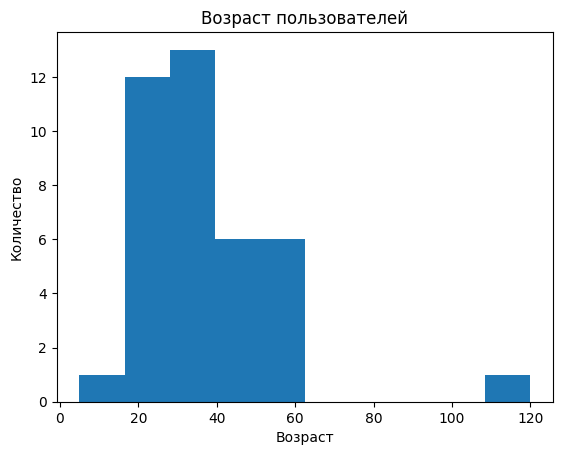

In [119]:
df['age'].plot.hist(bins=10, title='Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.savefig('C:/Users/User/test/study-materials/homeworks/HW02/figures/figure_1.png')
plt.show()

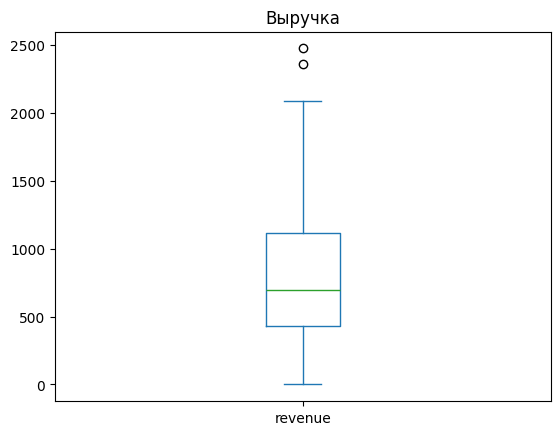

In [120]:
# Боксплот
df['revenue'].plot.box(title='Выручка')
plt.savefig('C:/Users/User/test/study-materials/homeworks/HW02/figures/box_plot.png')
plt.show()

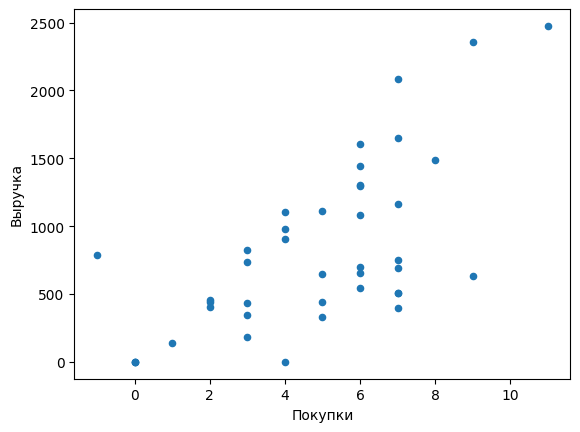

In [121]:
# Scatter plot
df.plot.scatter(x='purchases', y='revenue')
plt.xlabel("Покупки")
plt.ylabel("Выручка")
plt.savefig('C:/Users/User/test/study-materials/homeworks/HW02/figures/scatter_plot.png')
plt.show()